In [2]:
  import frozen_lake as fl
  import numpy as np
  from collections import defaultdict
  import matplotlib.pyplot as plt
  import collections
  import matplotlib.pyplot as plt 
  import random


In [3]:
env = fl.FrozenLakeEnv(map_name="4x4", slip_rate=0.1)

### 3.1

In [4]:
def sarsa(alpha,gamma, num_episodes, render, epsilon, seed, env):
    
    Q = np.zeros((16,4))
    env.seed(seed)
    rewards = []
    
    for i in range(num_episodes):
        
        state = env.reset()
        done = False
        
        p = np.random.random()
        if p < epsilon:
            action = np.random.choice(3)
        else:
            action = np.argmax(Q[state])
            
        
        udreward = 0
        
        while not done:
            
            if render:
                env.render()
        
            next_state, reward, done, extra = env.step(action)
            udreward += reward

            q = np.random.random()
            if q < epsilon:
                action_prime = np.random.choice(3)
            else:
                action_prime = np.argmax(Q[next_state])
            if done:
              Q[state, action] = Q[state,action] + alpha *(reward + gamma * 0 - Q[state,action])
              break

            else:
              Q[state, action] = Q[state,action] + alpha *(reward + gamma * Q[next_state, action_prime] - Q[state,action])
              state = next_state
              action = action_prime

          
        
        rewards.append(udreward)
            
    return Q, rewards
    
    

In [5]:
Q_final = []
rewards_final = np.zeros((10, 2000))
for i in range(10):
  Q, rewards_final[i,:] = sarsa(0.1, 0.99, 2000, False, 0.01, i, env)
  Q_final.append(Q)

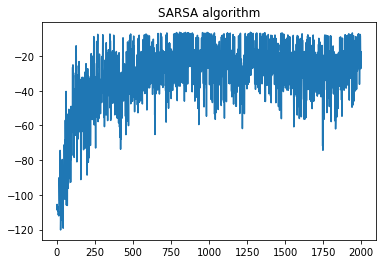

In [6]:
rewards_final_avg = np.average(rewards_final, axis=0)
plt.plot(rewards_final_avg)
plt.title("SARSA algorithm")
plt.show()

In [7]:
policy = Q_final[4]
def generate_episode(policy, env, render):
    state = env.reset()
    done = False
    episodes = []
    while not done:
        if render:
            env.render()
        action = np.argmax(policy[state, :])
        #action = np.random.choice(np.arange(4), p=policy[state,:])
        next_state, reward, done, extra = env.step(action)
        episodes.append((state, action, reward))
        state = next_state
    
    #return episodes

In [9]:
generate_episode(policy, env, True)


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


### 3.2


In [10]:
def expected_sarsa(alpha,gamma, num_episodes, render, epsilon, seed, env):
    
    Q = np.zeros((16,4))
    env.seed(seed)
    rewards = []
    
    for i in range(num_episodes):
        
        state = env.reset()
        done = False

        udreward = 0
        
        while not done:
            
            if render:
                env.render()
        
            p = np.random.random()
            if p< epsilon:
                action = np.random.choice(3)
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, extra = env.step(action)
            udreward += reward

            q_max = np.max(Q[next_state,:])
            greedy_action = 0
            for a in range(env.action_space.n):
                if Q[next_state, a] == q_max:
                    greedy_action +=1
              
            non_greedy_pi = epsilon / env.action_space.n
            greedy_pi = (1 - epsilon) /greedy_action + non_greedy_pi
            pi_Q = 0
            for i in range(env.action_space.n):
                if Q[next_state, i] == q_max:
                    pi_Q += Q[next_state, i] * greedy_pi
                else:
                    pi_Q += Q[next_state, i] * non_greedy_pi
            if done:
              Q[state, action] = Q[state,action] + alpha *(reward + gamma * 0 - Q[state,action])
              break

            else:
              Q[state, action] = Q[state,action] + alpha *(reward + gamma * pi_Q - Q[state,action])
              state = next_state

          
        
        rewards.append(udreward)
            
    return Q, rewards
    
    

In [11]:
Q_final_exsarsa = []
rewards_final_exsarsa = np.zeros((10, 2000))
for i in range(10):
  Q_exsarsa, rewards_final_exsarsa[i,:] = expected_sarsa(0.2, 0.99, 2000, False, 0.01, i, env)
  Q_final_exsarsa.append(Q_exsarsa)

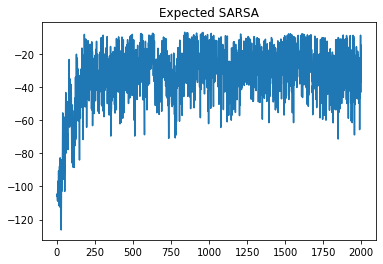

In [12]:
rewards_final_avg_exsarsa = np.average(rewards_final_exsarsa, axis=0)
#for i in range(16):
plt.plot(rewards_final_avg_exsarsa)
plt.title("Expected SARSA")
#plt.legend(loc=1, fontsize = 'x-small')
plt.show()

In [14]:
policy_expected_exsarsa = Q_final_exsarsa[7]
generate_episode(policy_expected_exsarsa, env, True)



SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


### 3.3

In [15]:
def Q_learning(alpha,gamma, num_episodes, render, epsilon, seed, env):
    
    Q = np.zeros((16,4))
    env.seed(seed)
    rewards = []
    
    for i in range(num_episodes):
        
        state = env.reset()
        done = False
        udreward = 0


        while not done:
            
            if render:
                env.render()
            np.random

            p = np.random.random()
            if p< epsilon:
                action = np.random.choice(3)
            else:
                action = np.argmax(Q[state])
            
        
            next_state, reward, done, extra = env.step(action)
            udreward += reward
            if done:
                Q[state, action] = Q[state,action] + alpha *(reward + gamma *  0 - Q[state,action])
                break

            else:

                Q[state, action] = Q[state,action] + alpha *(reward + gamma *  np.max(Q[next_state,:]) - Q[state,action])
                state = next_state

        
        rewards.append(udreward)
            
    return Q, rewards
    
    

In [16]:
Q_final_qlearning = []
rewards_final_qlearning = np.zeros((10, 2000))
for i in range(10):
  Q_qlearning, rewards_final_qlearning[i,:] = Q_learning(0.1, 0.99, 2000, False, 0.02, i, env)
  Q_final_qlearning.append(Q_qlearning)

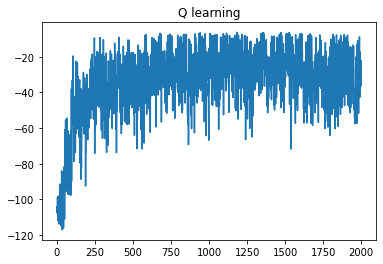

In [17]:
rewards_final_avg_qlearning = np.average(rewards_final_qlearning, axis=0)
#for i in range(16):
plt.plot(rewards_final_avg_qlearning)
plt.title("Q learning")
#plt.legend(loc=1, fontsize = 'x-small')
plt.show()

In [22]:
policy_Q_qlearning = Q_final_qlearning[8]
generate_episode(policy_Q_qlearning, env, True)



SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
